# Simple Harmonic Motion

The equation of motion for an SHM is:

$$ \ddot{x} = - \omega^2 x$$

Here let's take 
$\omega = \sqrt{\frac{k}{m}} = 1$
for convinence. We will now write the 2nd order differential equation into two coupled first order differential equation.

$$\dot{x} = p$$
$$\dot{p} = -x$$



In [8]:
def odeEuler(t0,initial,tf,h=0.1):
    
    x0,p0 = initial
    t = np.arange(t0,tf,h)
    
    x = np.zeros(len(t))
    p = np.zeros(len(t))
    
    x[0] = x0
    p[0] = p0
    
    for n in range(0,len(t)-1):
        x[n+1] = x[n] + h*p[n]
        p[n+1] = p[n] - h*x[n]
        
    return t,x,p

In [55]:
def RK2(t0,initial,tf,h=0.1):
    
    x0,p0 = initial
    t = np.arange(t0,tf,h)
    
    x = np.zeros(len(t))
    p = np.zeros(len(t))
    
    x[0] = x0
    p[0] = p0
    
    for n in range(0,len(t)-1):
        
        k1x = p[n];
        k1p = -x[n];
        
        k2x = p[n] + h*k1p
        k2p = -x[n] - h*k1x
        
        x[n+1] = x[n] + (h/2)*(k1x+k2x);
        p[n+1] = p[n] + (h/2)*(k1p+k2p);
        
        
        
    return t,x,p

In [56]:
def RK4(t0,initial,tf,h=0.1):
    
    x0,p0 = initial
    t = np.arange(t0,tf,h)
    
    x = np.zeros(len(t))
    p = np.zeros(len(t))
    
    x[0] = x0
    p[0] = p0
    
    for n in range(0,len(t)-1):
        
        k1x = p[n];
        k1p = -x[n];
        
        k2x = p[n] + (h/2)*k1p
        k2p = -x[n] - (h/2)*k1x
        
        k3x = p[n] + (h/2)*k2p
        k3p = -x[n] - (h/2)*k2x
        
        k4x = p[n] + h*k3p
        k4p = -x[n] - h*k3x
        
        x[n+1] = x[n] + (h/6)*(k1x+2*k2x+2*k3x+k4x);
        p[n+1] = p[n] + (h/6)*(k1p+2*k2p+2*k3p+k4p);
        
        
        
    return t,x,p

In [11]:
import numpy as np
import matplotlib.pyplot as plt

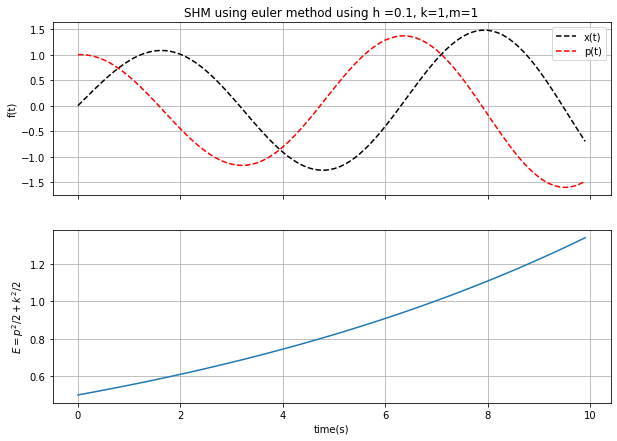

In [94]:
t,x,p=odeEuler(0,[0,1],10,0.1);
E = (1/2)*(p**2+x**2)
fig,ax = plt.subplots(2,1,sharex=True,figsize=[10,7])
ax[0].grid()
ax[0].plot(t,x,"k--",label="x(t)")
ax[0].plot(t,p,"r--",label="p(t)")
ax[0].legend()
ax[0].set_ylabel("f(t)")
ax[1].plot(t,E)
ax[1].grid()
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("$E = p^2/2 + k^2/2$")
ax[0].set_title("SHM using euler method using h =0.1, k=1,m=1")

plt.savefig("SHMeuler.pdf")

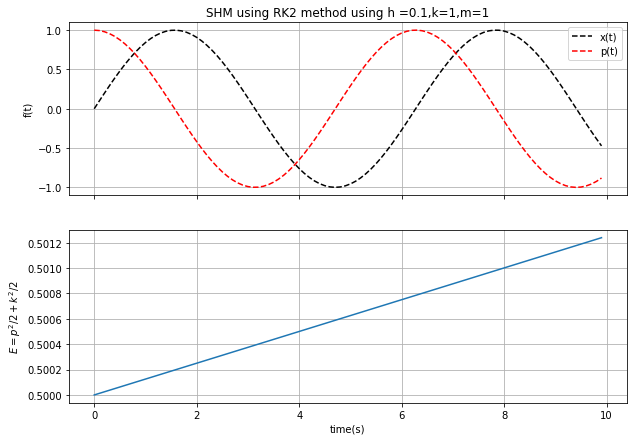

In [95]:
t,x,p=RK2(0,[0,1],10,0.1);
E = (1/2)*(p**2+x**2)
fig,ax = plt.subplots(2,1,sharex=True,figsize=[10,7])
ax[0].plot(t,x,"k--",label="x(t)")
ax[0].grid()
ax[0].plot(t,p,"r--",label="p(t)")
ax[0].legend()
ax[0].set_ylabel("f(t)")
ax[1].plot(t,E)
ax[1].grid()
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("$E = p^2/2 + k^2/2$")
ax[0].set_title("SHM using RK2 method using h =0.1,k=1,m=1")
plt.savefig("SHMRK2.pdf")

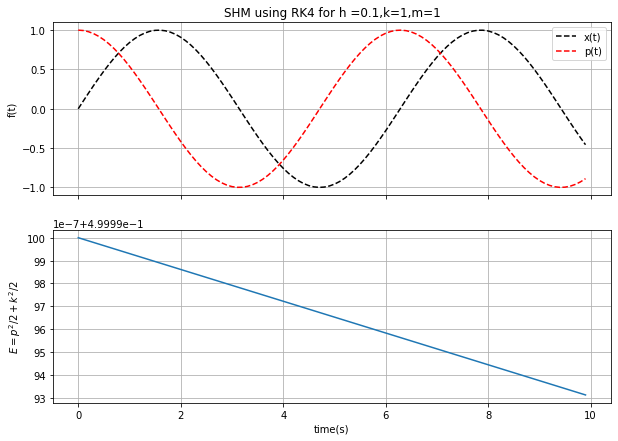

In [96]:
t,x,p=RK4(0,[0,1],10,0.1);
E = (1/2)*(p**2+x**2)
fig,ax = plt.subplots(2,1,sharex=True,figsize=[10,7])
ax[0].plot(t,x,"k--",label="x(t)")
ax[0].plot(t,p,"r--",label="p(t)")
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel("f(t)")
ax[1].plot(t,E)
ax[1].grid()
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("$E = p^2/2 + k^2/2$")
ax[0].set_title("SHM using RK4 for h =0.1,k=1,m=1")
plt.savefig("SHMRK4.pdf")

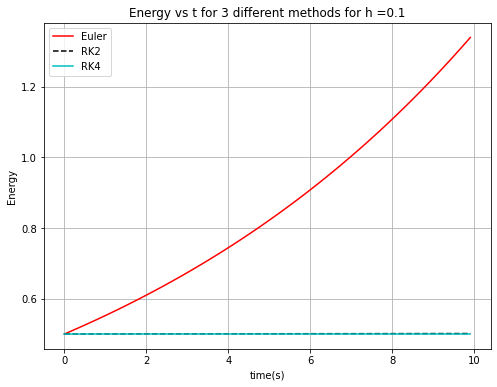

In [89]:
t,x1,p1=odeEuler(0,[0,1],10,0.1);
t,x2,p2=RK2(0,[0,1],10,0.1);
t,x3,p3=RK4(0,[0,1],10,0.1);

E1 = (1/2)*(p1**2+x1**2)
E2 = (1/2)*(p2**2+x2**2)
E3 = (1/2)*(p3**2+x3**2)

plt.figure(figsize=[8,6])
plt.plot(t,E1,"r",label="Euler")
plt.plot(t,E2,"k--",label="RK2")
plt.plot(t,E3,"c",label="RK4")
plt.legend()

plt.xlabel("time(s)")
plt.ylabel("Energy")
plt.title("Energy vs t for 3 different methods for h =0.1")
plt.grid()

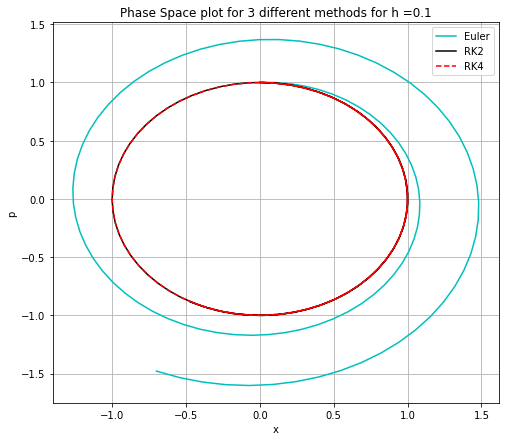

In [90]:
t,x1,p1=odeEuler(0,[0,1],10,0.1);
t,x2,p2=RK2(0,[0,1],10,0.1);
t,x3,p3=RK4(0,[0,1],10,0.1);

plt.figure(figsize=[8,7])
plt.plot(x1,p1,"c",label="Euler")
plt.plot(x2,p2,"k",label="RK2")
plt.plot(x3,p3,"r--",label="RK4")
plt.legend()

plt.xlabel("x")
plt.ylabel("p")
plt.title("Phase Space plot for 3 different methods for h =0.1")
plt.grid()
plt.savefig("phasespaceshm.pdf")